# Develop a Convolutional Neural Network From Scratch for MNIST Handwritten Digit Classification

The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning.

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch.

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.
It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

Import the following Python Libraries.

pyplot library allows you create plots.

mnist library allows you download and manage mnist dataset.

tf tensorflow is the backend of your ANN neural network model.



In [2]:
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.image as img 
import numpy as np
from skimage.transform import rescale, resize

# Downloading the MNIST Dataset.


The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, let's will start with the following two lines to import the MNIST dataset under the Keras API.

Create your training and testing sample x_train and x_test and their corresponding labels y_train and y_test


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Let's have a look at our data shape and quantity:

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Let's iterate through some of our dataset samples and visualize them: 

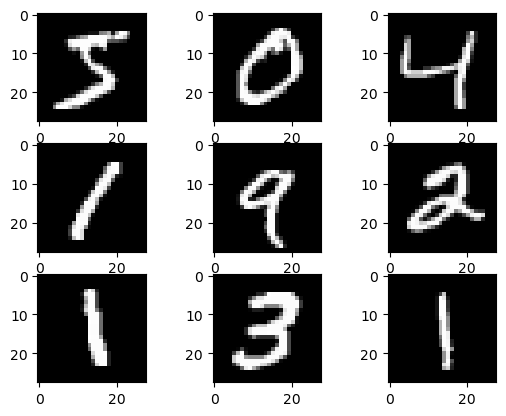

In [5]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Reshaping and Normalizing the Images


To be able to use the dataset in Keras API, we need 4-dims NumPy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:

Adding an extra dimension to our data. The extra dimension takes care of the image batch size.

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Print dimensions
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


Let’s convert our images to NumPy array. This allows simple application of arithmetic operation. 

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

We must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code).

In [8]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Let’s import Keras libraries that allow us to build our very first neural network model. 

In [9]:
from keras import Sequential
from keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D

This is how we create CNN models in Keras. This particular example shows a very simple Sequential model which includes a Input layer, Convolutional layer, MaxPooling layer, a Flattening layer, a normal fully connected (dense) layer and at the end a softmax layer which converts the output of the final layer (also known as logits) to probabilities for prediction.  

In [13]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

None


Let's compile our model. Assigning the optimizer [Stochastic Gradian Descend], loss function and our desired evaluation metrics. 

In [14]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Let's start trainig our model for 5 epochs (5 rounds of feedforward and backpropagation over the entire dataset). This may take a while. 

In [15]:
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7562 - loss: 0.8722
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9262 - loss: 0.2485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9422 - loss: 0.1899
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9519 - loss: 0.1601
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9597 - loss: 0.1364


Let's evaluate our trained model using the test data:

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9649 - loss: 0.1134
Loss: 0.0992739200592041, Accuracy: 0.9684000015258789


The results are pretty good for 5 epochs and for such a simple model. We have achieved over 96% accuracy with such a basic model at such a short time. 

We can make individual predictions using our own hand writing digit data. Idea: open MS paint, create a small square-ish work space and draw your desired number using black colour.

Store your masterpiece as a "sample.png" file and upload it to your jupyter Notebook work space, in the same directory as this file.

In [35]:
from keras.preprocessing import image

img_path = 'sample.png'
img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)

Visualize image:

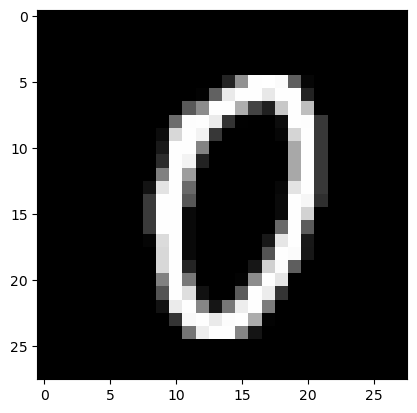

In [36]:
plt.imshow(img_array, cmap='gray')

Checkout the prediction of our trained convolutional neural network:

In [37]:
# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict class
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print("It seems to be ", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
It seems to be  0
